In [1]:
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
data=pd.read_csv("/content/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: ylabel='age'>

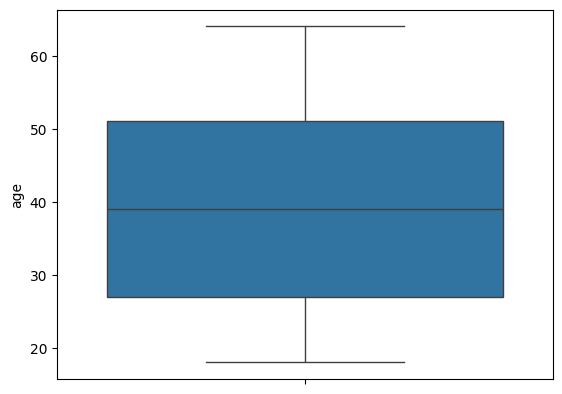

In [4]:
sn.boxplot(data['age'])

In [5]:
iqr=data['age'].quantile(0.75)-data['age'].quantile(0.25)
iqr

24.0

In [6]:
lb=data['age'].quantile(0.25)-(1.5*iqr)
lb

-9.0

In [7]:
upb=data['age'].quantile(0.75)+(1.5*iqr)
upb

87.0

In [9]:
data['age']=np.where((data['age'])>upb,upb,data['age'])
data['age']=np.where((data['age'])<lb,lb,data['age'])

In [11]:
data.isnull

<bound method DataFrame.isnull of        age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900         0    yes  southwest  16884.92400
1     18.0    male  33.770         1     no  southeast   1725.55230
2     28.0    male  33.000         3     no  southeast   4449.46200
3     33.0    male  22.705         0     no  northwest  21984.47061
4     32.0    male  28.880         0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970         3     no  northwest  10600.54830
1334  18.0  female  31.920         0     no  northeast   2205.98080
1335  18.0  female  36.850         0     no  southeast   1629.83350
1336  21.0  female  25.800         0     no  southwest   2007.94500
1337  61.0  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

<Axes: ylabel='age'>

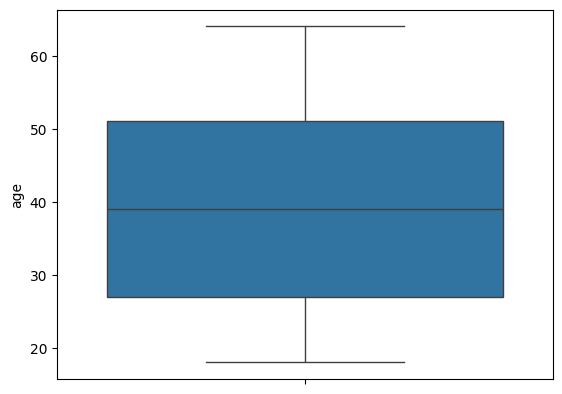

In [12]:
sn.boxplot(data['age'])

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label = LabelEncoder()

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [16]:
data['sex']=label.fit_transform(data['sex'])
data['smoker']=label.fit_transform(data['smoker'])
data['region']=label.fit_transform(data['region'])

In [18]:
x=data.drop(columns='charges')
y=data['charges']

In [20]:
x


,age,sex,bmi,children,smoker,region
0,19.0,0,27.900,0,1,3
1,18.0,1,33.770,1,0,2
2,28.0,1,33.000,3,0,2
3,33.0,1,22.705,0,0,1
4,32.0,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1
1334,18.0,0,31.920,0,0,0
1335,18.0,0,36.850,0,0,2
1336,21.0,0,25.800,0,0,3


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()

In [24]:
X=sc.fit_transform(x)

In [25]:
x

,age,sex,bmi,children,smoker,region
0,19.0,0,27.900,0,1,3
1,18.0,1,33.770,1,0,2
2,28.0,1,33.000,3,0,2
3,33.0,1,22.705,0,0,1
4,32.0,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1
1334,18.0,0,31.920,0,0,0
1335,18.0,0,36.850,0,0,2
1336,21.0,0,25.800,0,0,3


In [26]:
X=pd.DataFrame(x)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
x_train.head()

,age,sex,bmi,children,smoker,region
559,19.0,1,35.530,0,0,1
273,50.0,1,27.455,1,0,0
471,18.0,0,30.115,0,0,0
22,18.0,1,34.100,0,0,2
939,53.0,1,29.480,0,0,2


In [30]:
x_test.head()

,age,sex,bmi,children,smoker,region
7,37.0,0,27.740,3,0,1
999,36.0,0,26.885,0,0,1
1209,59.0,1,37.100,1,0,3
491,61.0,0,25.080,0,0,2
625,29.0,0,26.030,0,0,1


In [31]:
y_train.head()

559    1646.42970
273    9617.66245
471    2203.47185
22     1137.01100
939    9487.64420
Name: charges, dtype: float64

In [32]:
y_test.head()

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
Name: charges, dtype: float64